In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plp

In [42]:
#Load data 
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [43]:
#Data information
print("rows:",df.shape[0], "\nColumns:", df.shape[1])

rows: 891 
Columns: 15


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [45]:
##Data cleaning
#first find null value using is.null command
null_values=df.isnull().sum().sort_values(ascending=False)

In [46]:
#Percentage of null values, delete it with solid reason 
#general rule is, if null values are more than 40% delete it
per_null=(null_values/df.shape[0])*100
print(per_null)

deck           77.216611
age            19.865320
embarked        0.224467
embark_town     0.224467
survived        0.000000
pclass          0.000000
sex             0.000000
sibsp           0.000000
parch           0.000000
fare            0.000000
class           0.000000
who             0.000000
adult_male      0.000000
alive           0.000000
alone           0.000000
dtype: float64


In [47]:
#remove deck column
df.drop("deck",axis=1, inplace=True)     #tell that you are deleting column not row, for row axis=0

In [48]:
#Check wheter the deck column is deleted
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [49]:
#next age is less than 40% null values so just fill is carefully

##df["age"].fillna(df["age"].median(),inplace=True)

#Task 1: fill data with zero


In [50]:
df["age"].fillna(0)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     0.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [51]:
# checking duplicate values
df.duplicated().sum()

111

#Passengers who have traveled with family members(siblings.....) had a higher chance of survival 
#the titanic disaster

#hint: combine sibsp+ parch in 1 column as family
survival comparison with family

In [74]:
#creating family that includes siblings, spouses etc..
df['family'] = df['sibsp'] + df['parch']

In [75]:
df.family.dtypes

dtype('int64')

C:\Users\ABC\AppData\Local\Temp\ipykernel_8492\3545826551.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='family',y='survived',data=df,ci=False)


<Axes: xlabel='family', ylabel='survived'>

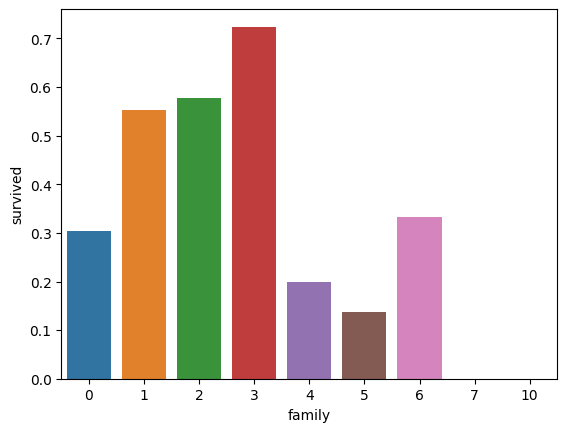

In [121]:
#survival chances Comparison of family via survival_rate.

sns.barplot(x='family',y='survived',data=df,ci=False)

In [122]:
#Interpretation: The above bar chart depicts that family of 3 have higher survival chances, then family of
# 1,2 and 6 are lower as compared to family of 3. However, overall family members had higher chance of survival in comparison 
#to singles but large families suffered a lot in disaster.

#Task: Make a dataset with 3 columns, 5 rows , two rows similar then delete 1 row

In [123]:

df1={'index':[1,2,2,4,5],
    'Fruits':['apple','banana','banana','strawberry','mango'],
    'Numbers':[3,4,4,8,9]}
data=pd.DataFrame(df1)
print(data)

   index      Fruits  Numbers
0      1       apple        3
1      2      banana        4
2      2      banana        4
3      4  strawberry        8
4      5       mango        9


In [124]:
data.duplicated().sum()

1

In [125]:
#Now dropping 1 row from it 
data.drop_duplicates(inplace=True)
data.duplicated().sum()   ##now checking is it deleted or not. 
print(data)

   index      Fruits  Numbers
0      1       apple        3
1      2      banana        4
3      4  strawberry        8
4      5       mango        9


In [126]:
#reset the index
data.reset_index(drop=True, inplace=True)
print(data)

   index      Fruits  Numbers
0      1       apple        3
1      2      banana        4
2      4  strawberry        8
3      5       mango        9


In [127]:
#saving file in csv
data.to_csv("Clean_Data.csv",index_label=False)